In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
from random import random 
%matplotlib inline

datasets_wide = [
    'DLBCL', 'chop', 'DBCD', 
    'AML_Bull', 'vdv', 'NSBCD', 'MCLcleaned'
]

datasets_narrow = [
    'hdfail',  'Dialysis',  'dataOvarian1', 'dataDIVAT1', 'prostateSurvival', 'dataDIVAT3',  'nwtco', 'rott2', 'Aids2', 
    'LeukSurv', 'actg', 'UnempDur', 'scania', 'divorce',  'TRACE',  'nki70', 'micro.censure', 'phpl04K8a', 'zinc', 'whas500', 
    'dataDIVAT2', 'cost', 'rdata', 'GBSG2', 'grace', 'd.oropha.rec', 'retinopathy', 'ova', 'Unemployment', 'cgd', 'Z243', 
    'follic', 'burn', 'pharmacoSmoking', 'pbc', 'diabetes', 'veteran', 'Melanoma', 'e1684', 'Bergamaschi', 'breast', 
    ]

datasets = datasets_wide + datasets_narrow

models = [
    'logistic_regression', 'trit_logistic_regression', 'random_forest', 'trit_random_forest', 'ada_boost', 'trit_ada_boost', 
    'knn', 'trit_knn', 'svm', 'trit_svm'
]

names_map = {
    'logistic_regression': 'lr', 
    'trit_logistic_regression': 'trit_lr',
    'ridge_cox': 'ridge_cox', 
    'random_forest': 'rf', 
    'trit_random_forest': 'trit_rf', 
    'ada_boost': 'ab', 
    'trit_ada_boost': 'trit_ab', 
    'knn': 'knn', 
    'trit_knn': 'trit_knn', 
    'svm': 'svm', 
    'trit_svm': 'trit_svm'
}

expand_name = {
    'logistic_regression' : 'LR',
    'trit_logistic_regression': 'TriT+LR', 
    'random_forest': 'RF', 
    'trit_random_forest': 'TriT[RF]', 
    'ada_boost': 'AB', 
    'trit_ada_boost': 'TriT[AB]', 
    'knn': r'$k$-NN', 
    'trit_knn': r'TriT[$k$-NN]', 
    'svm': 'SVM', 
    'trit_svm': 'TriT[SVM]'
}

metric_labels = {
    'cindex': 'C-index', 
    'mean_auc': 'Mean time-dpendent AUC', 
    'auc': 'Time-dependent AUC', 
    'brier': 'Brier score'
}

model_colors = {
    'logistic_regression': '#d8955b', 
    'random_forest': '#d8955b', 
    'ada_boost': '#d8955b', 
    'knn': '#d8955b', 
    'svm': '#d8955b', 
    'trit_logistic_regression': '#82beb0', 
    'trit_random_forest': '#82beb0', 
    'trit_ada_boost': '#82beb0', 
    'trit_knn': '#82beb0', 
    'trit_svm': '#82beb0'
}

color_names = {'#d8955b': 'Supervised', 
               '#82beb0': 'Semi-supervised'}

In [2]:
def showCindexComparison(dataset, models): 

    plt.figure(figsize=(4, 3))
    cindexes = []

    for model in models: 
        scores = pk.load(open(f'results/scores_dataset=({dataset})_model=({model}).pk', 'rb'))
        cindexes.append(scores['cindex'])

    xs = []
    for i, d in enumerate(cindexes): 
        xs.append(np.random.normal(i+1, 0.08, len(d))) 

    alpha_points = 0.2
    for i, (x,d) in enumerate(zip(xs, cindexes)): 
        for axis, point in zip(x, d): 
            plt.scatter(axis, point, alpha=alpha_points, color='green')

    bp = plt.boxplot(cindexes, labels=[names_map[m] for m in models], showfliers=False)
    plt.setp(bp['medians'], color='black', linestyle='--')

    plt.xlabel("models")
    plt.ylabel("C-index")
    plt.grid(axis='y')
    plt.title(dataset)
    plt.ylim(0,1)
    plt.show()

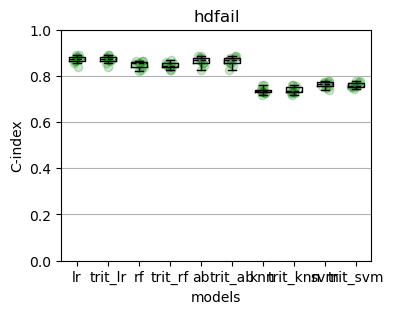

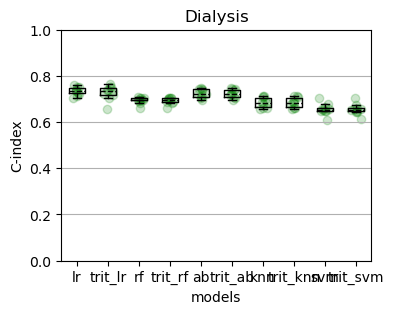

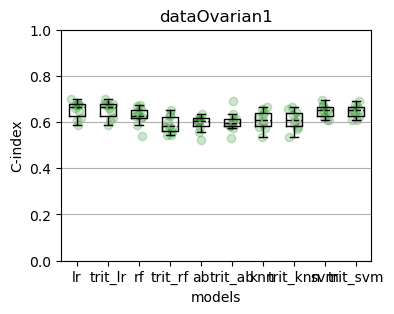

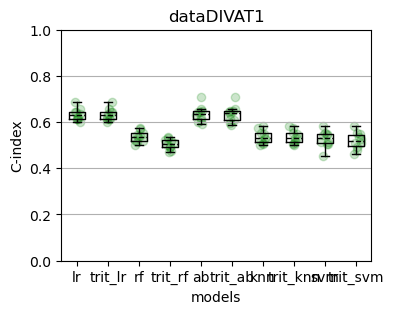

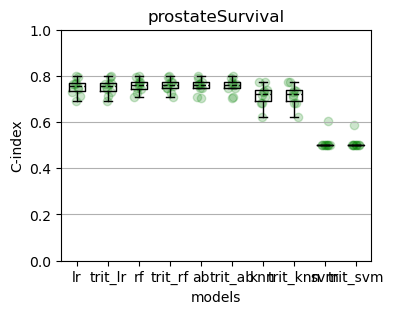

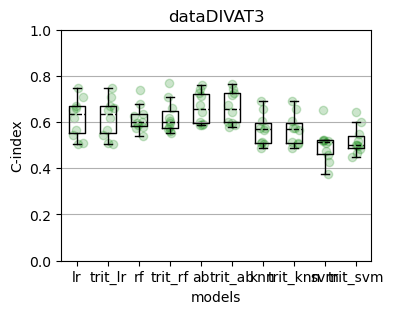

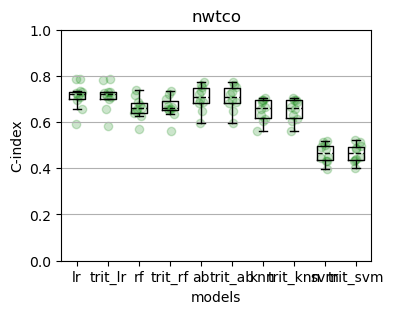

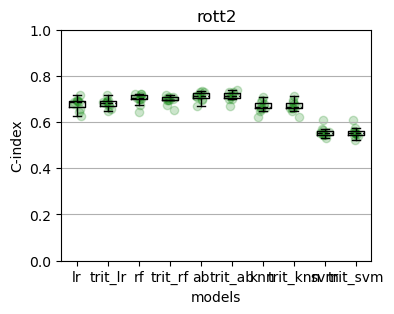

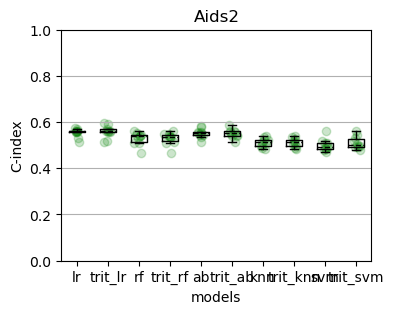

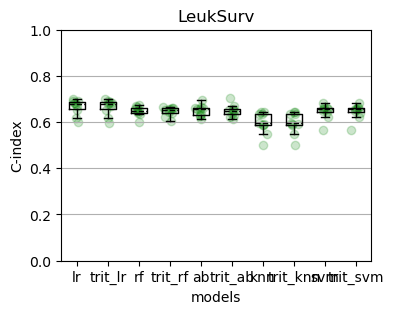

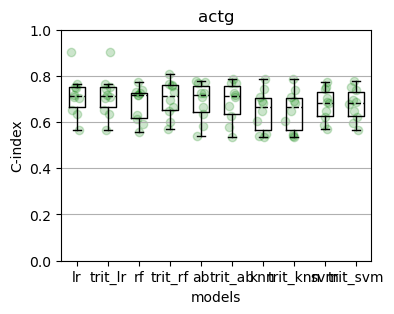

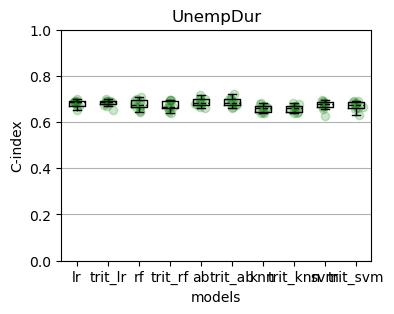

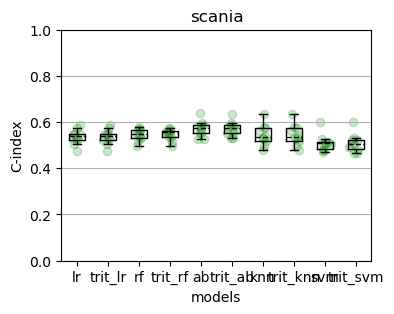

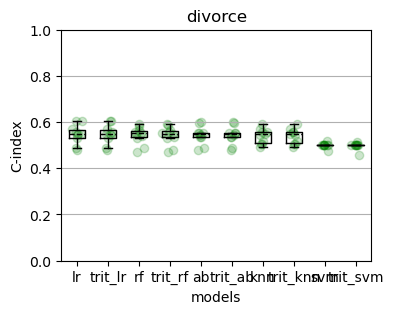

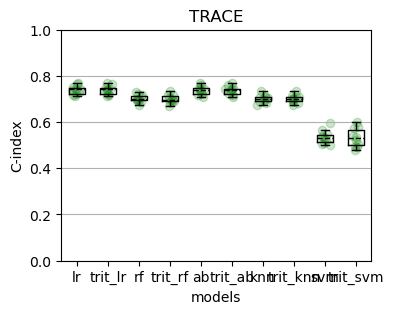

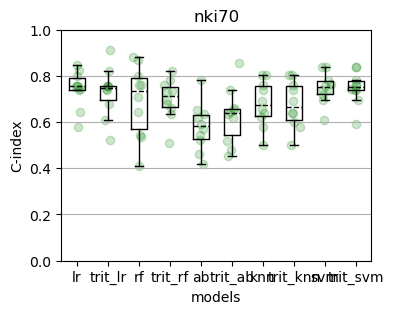

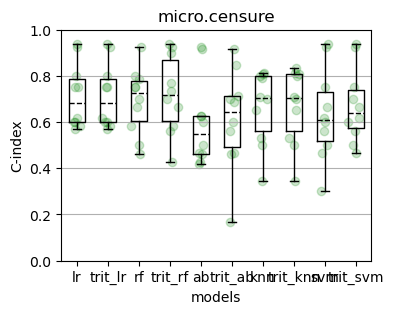

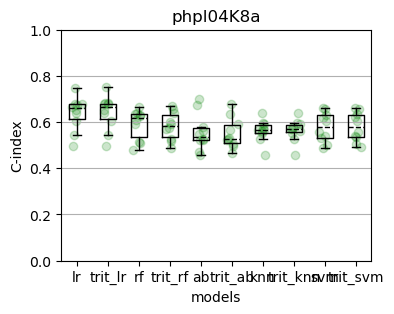

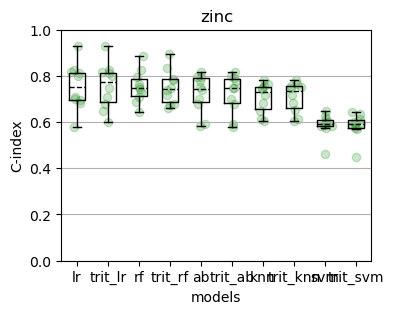

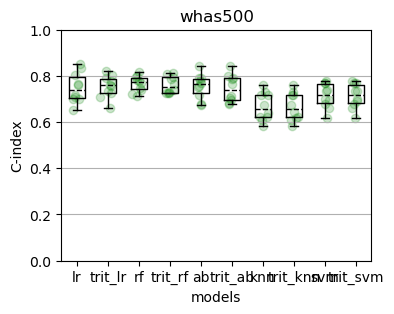

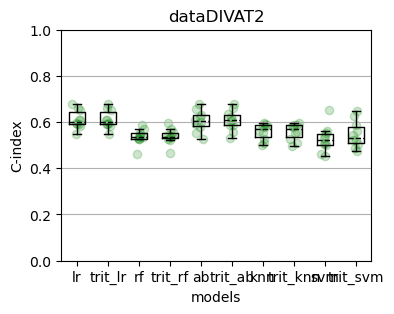

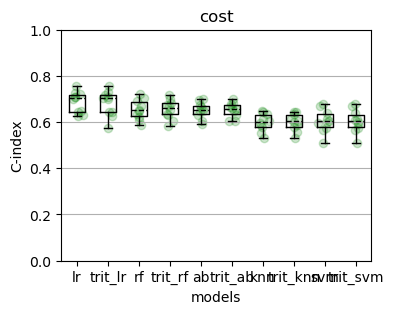

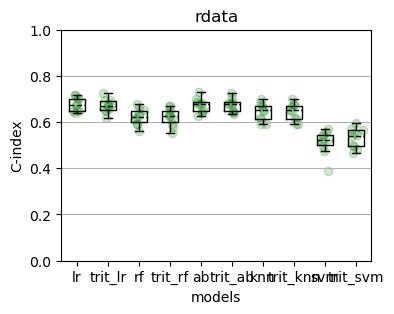

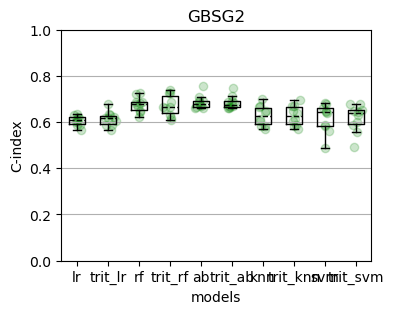

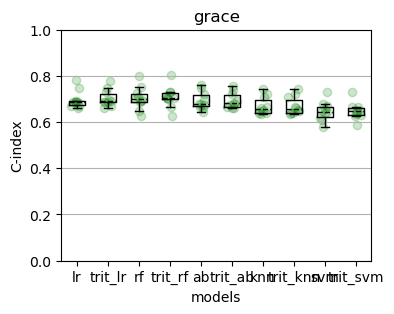

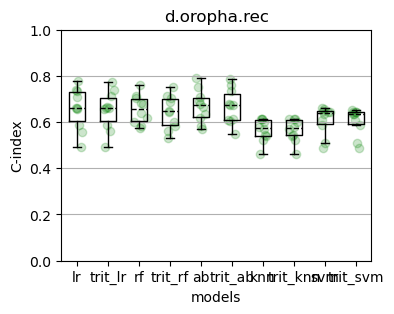

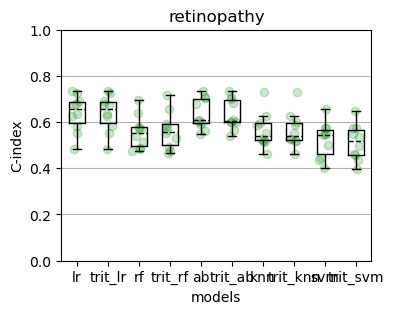

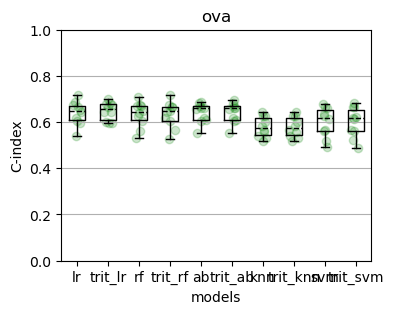

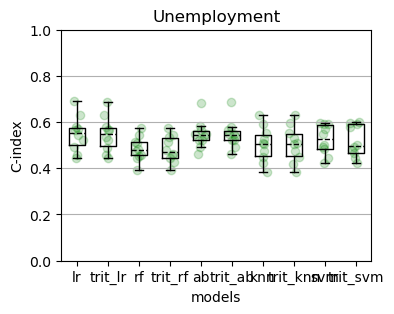

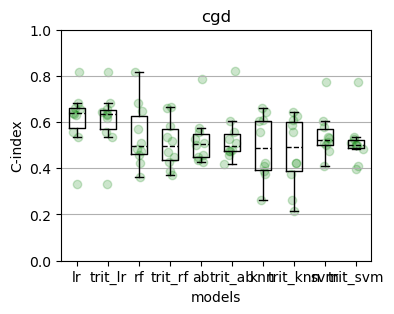

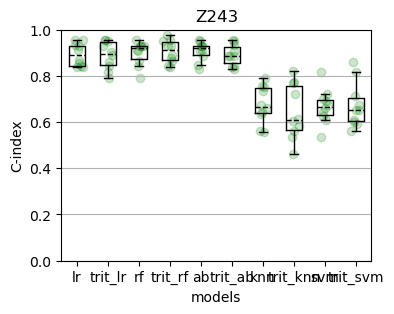

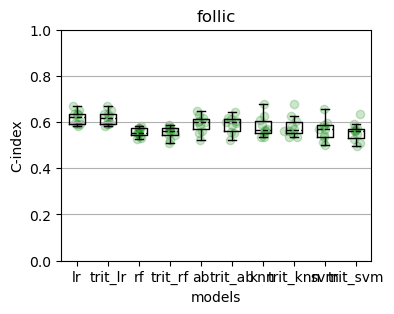

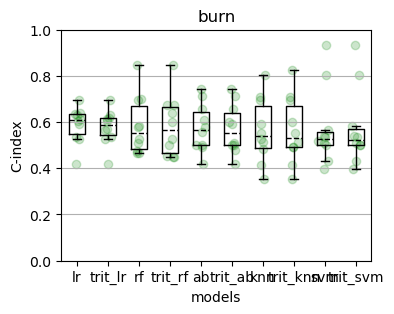

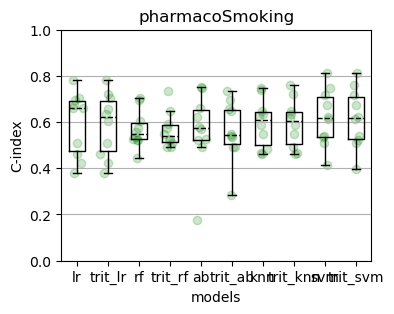

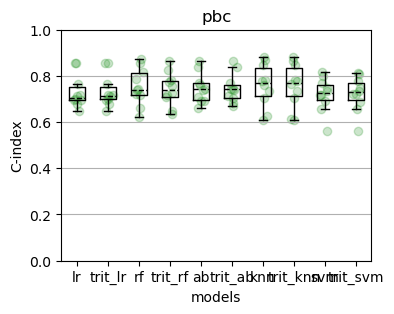

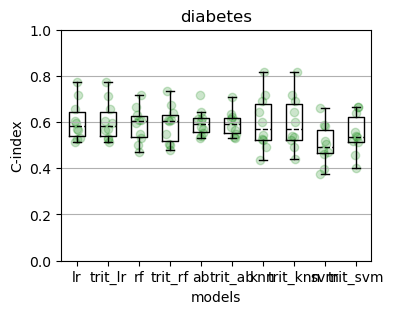

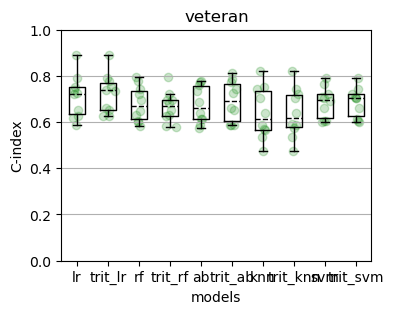

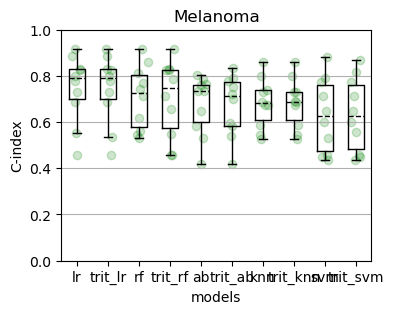

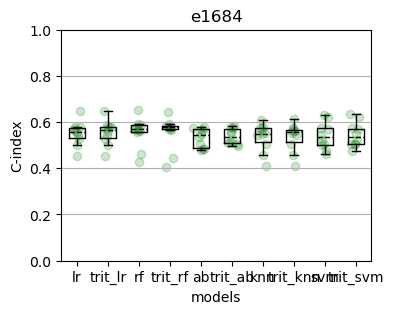

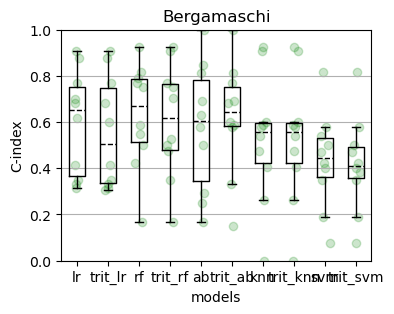

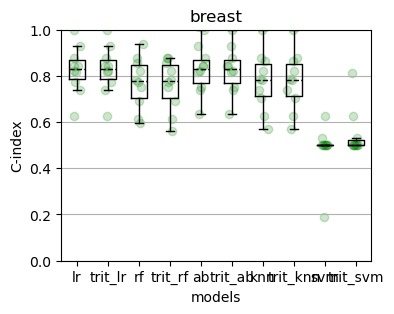

In [3]:
for dataset in datasets_narrow: 
    showCindexComparison(dataset, models)

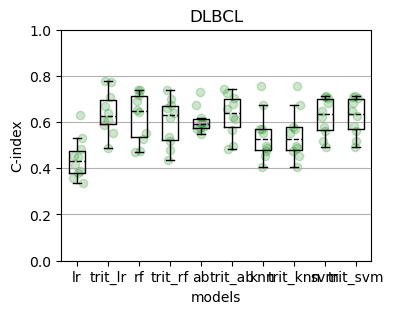

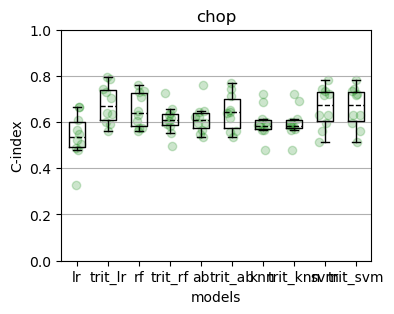

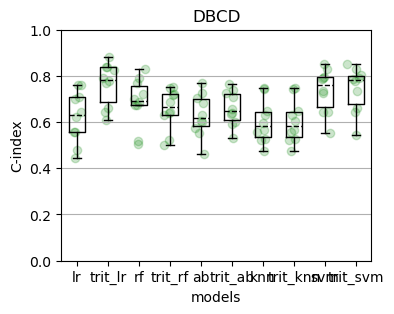

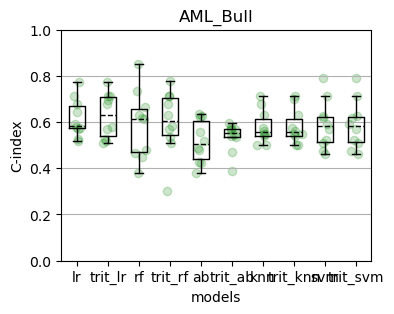

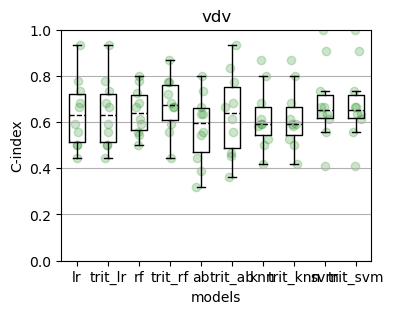

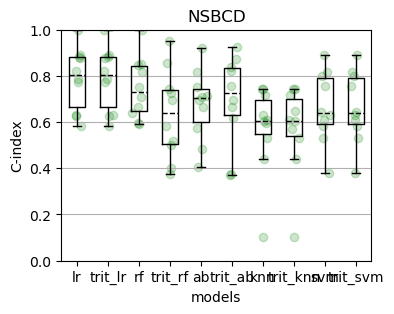

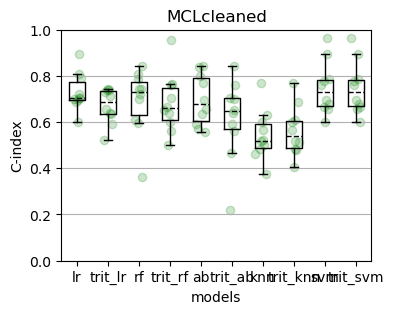

In [4]:
for dataset in datasets_wide: 
    showCindexComparison(dataset, models)

In [5]:
def showBrierComparison(dataset, models): 

    plt.figure(figsize=(4, 3))
    brier_scores = []
    
    for model in models: 
        scores = pk.load(open(f'results/scores_dataset=({dataset})_model=({model}).pk', 'rb'))
        brier_scores.append(scores['brier'])
    
    xs=[]
    for i, d in enumerate(brier_scores): 
        xs.append(np.random.normal(i+1, 0.08, len(d)))  

    alpha_points = 0.2
    for i, (x, d) in enumerate(zip(xs, brier_scores)): 
        for axis, point in zip(x, d): 
            plt.scatter(axis, point, alpha=alpha_points, color='orange')

    bp = plt.boxplot(brier_scores, labels=[names_map[m] for m in models], showfliers=False)
    plt.setp(bp['medians'], color='black', linestyle='--')

    plt.xlabel("models")
    plt.ylabel("Vrier score")
    plt.grid(axis='y')
    plt.title(dataset)
    plt.ylim(0,1)
    plt.show()


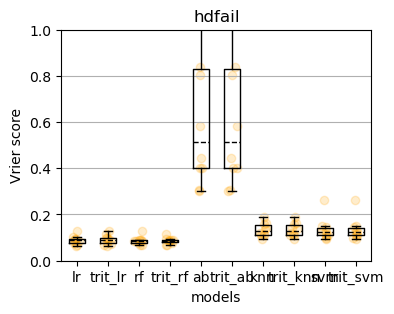

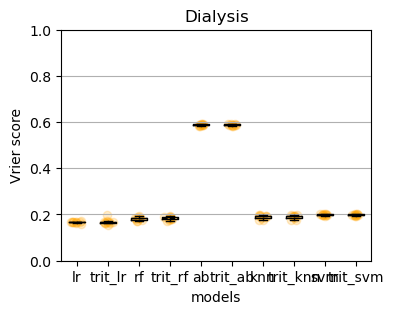

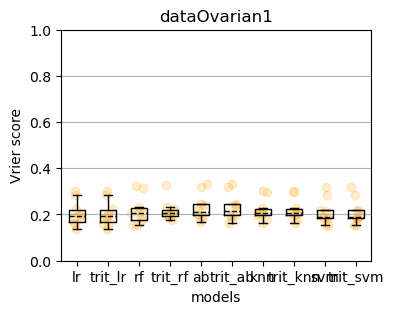

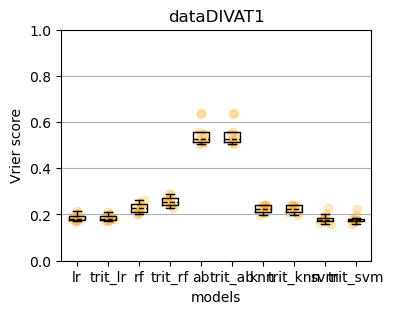

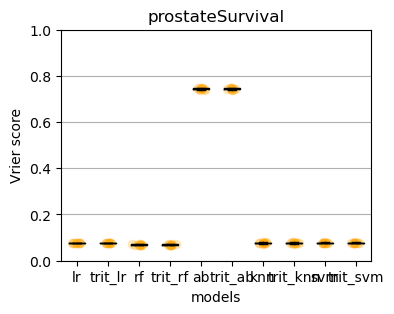

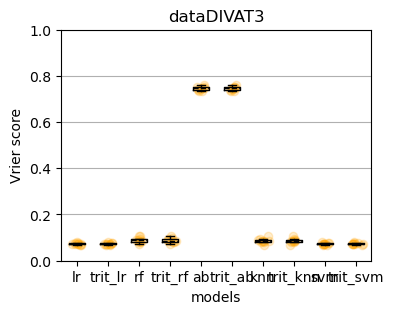

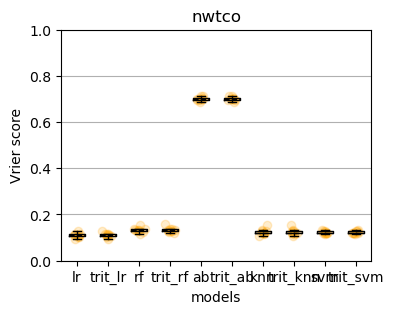

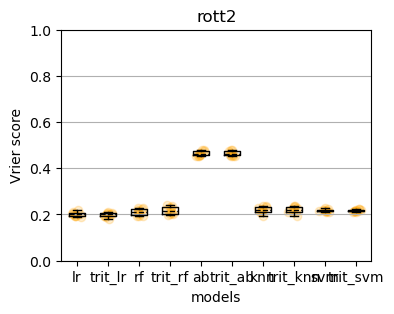

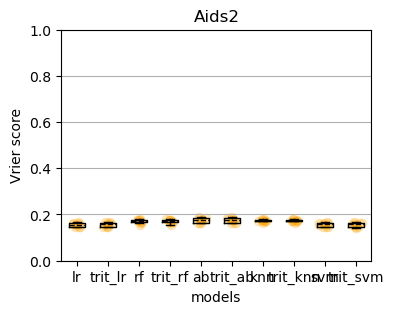

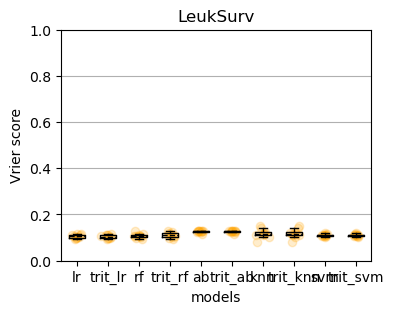

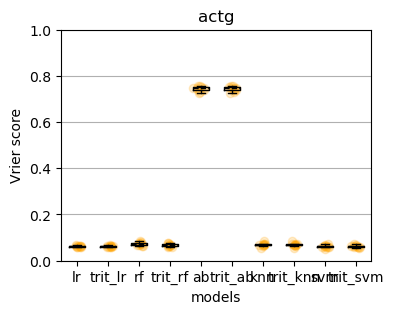

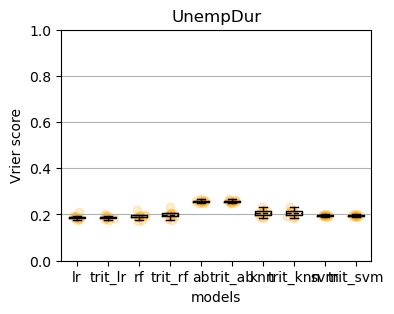

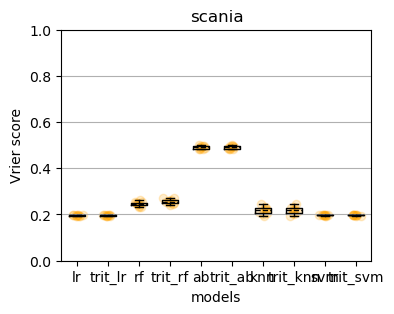

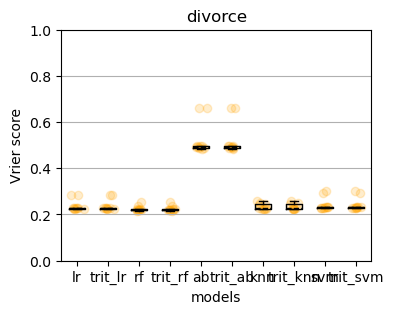

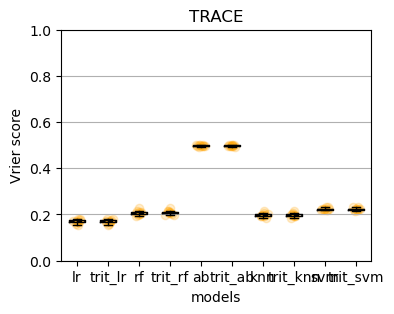

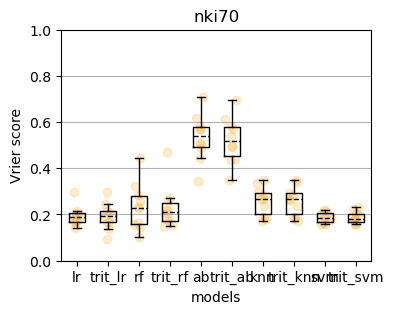

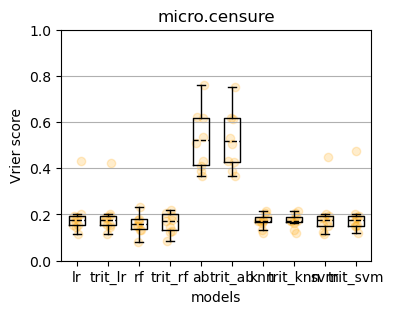

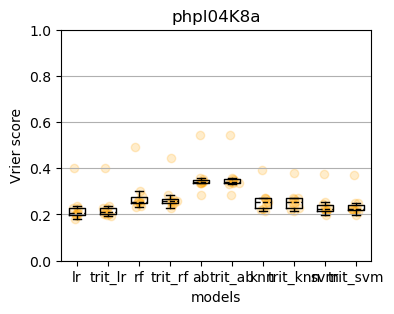

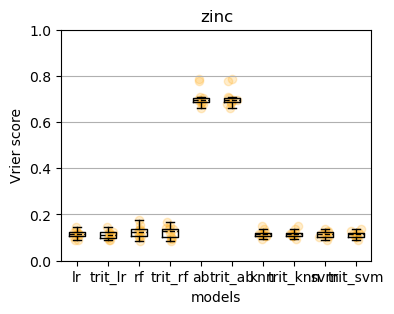

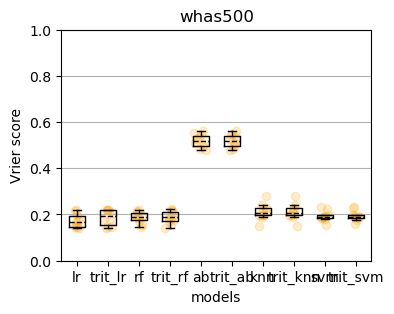

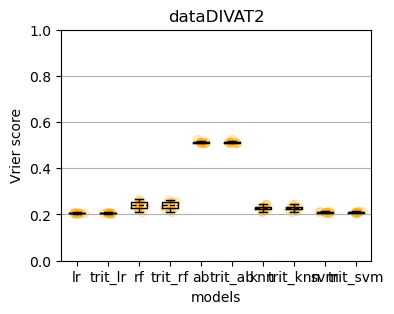

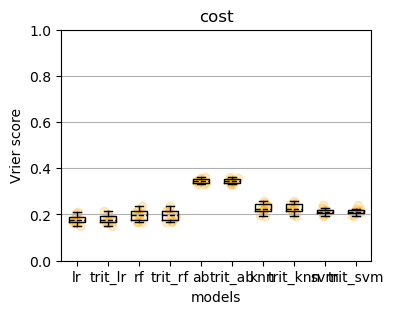

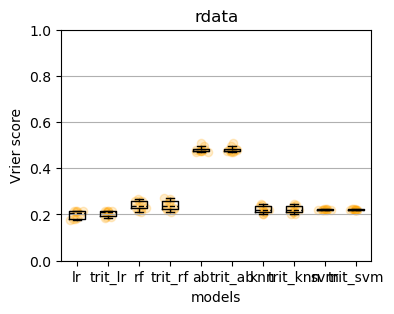

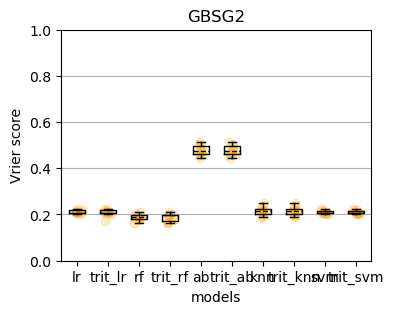

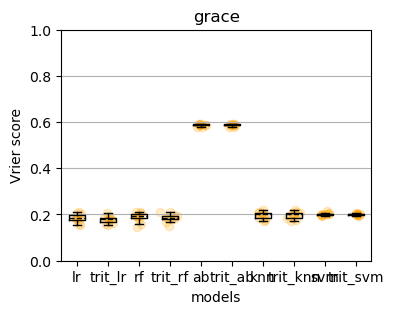

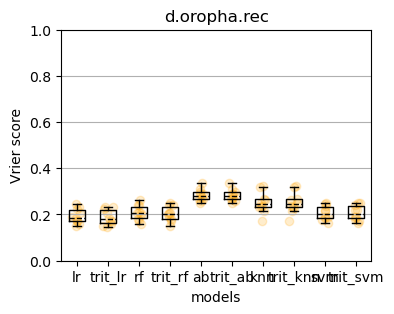

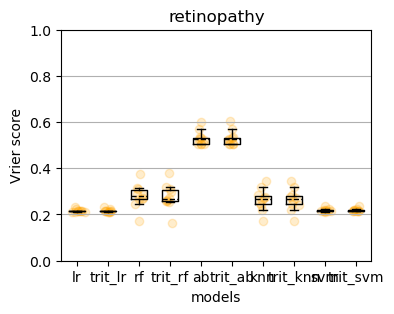

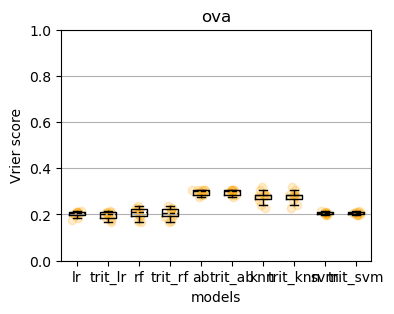

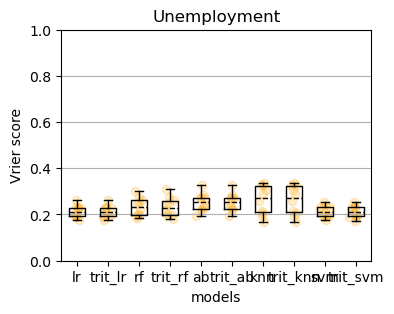

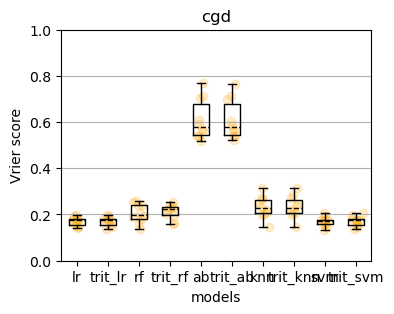

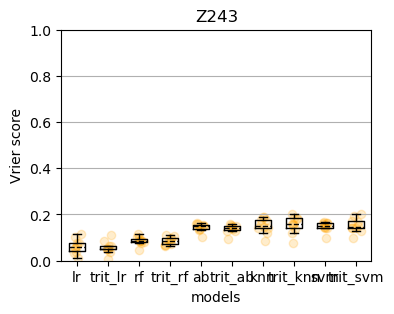

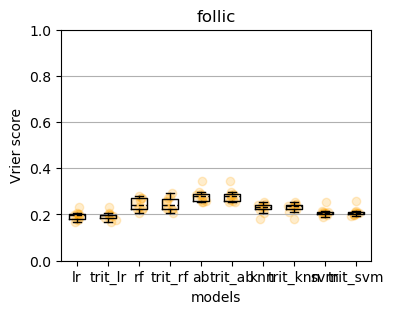

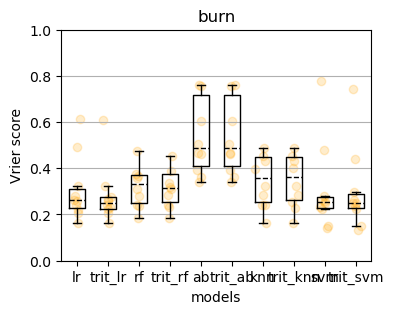

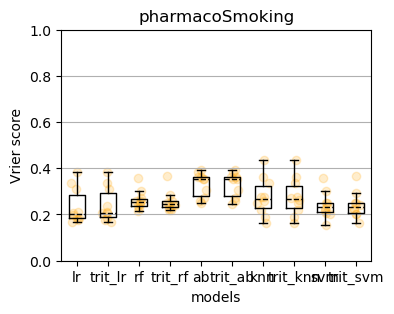

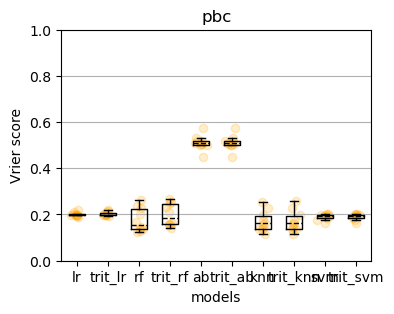

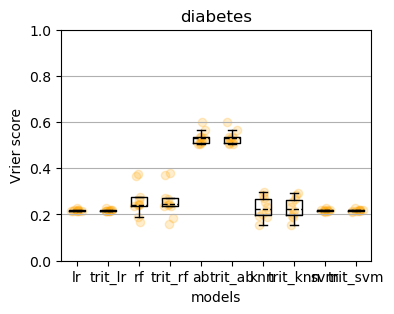

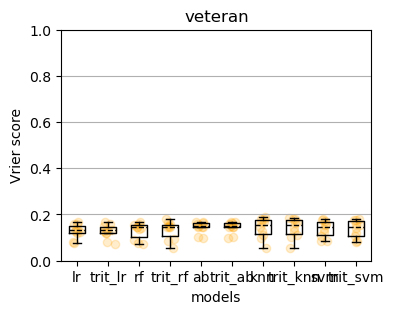

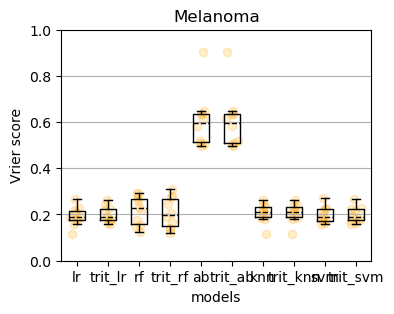

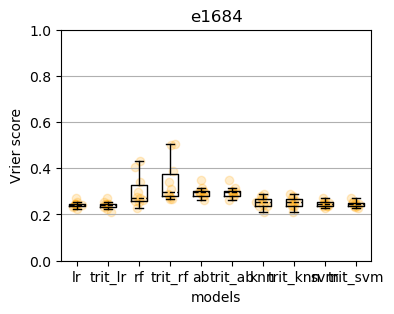

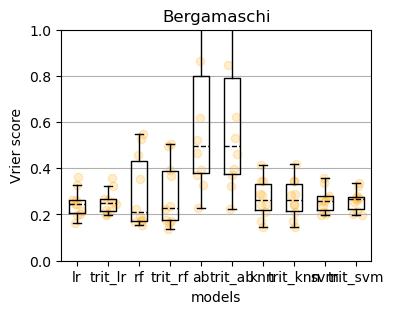

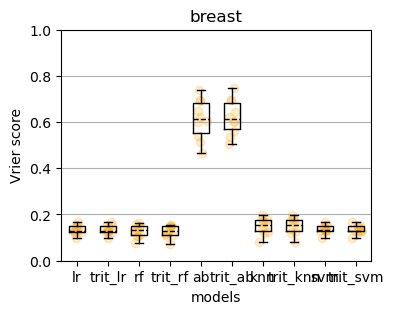

In [6]:
for dataset in datasets_narrow: 
    showBrierComparison(dataset, models)

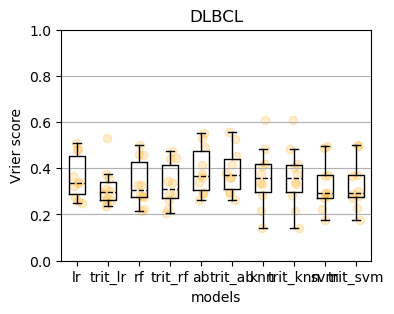

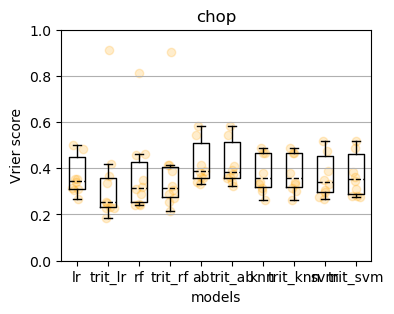

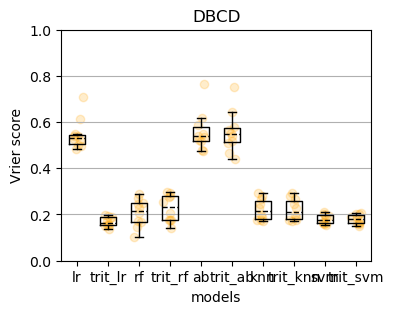

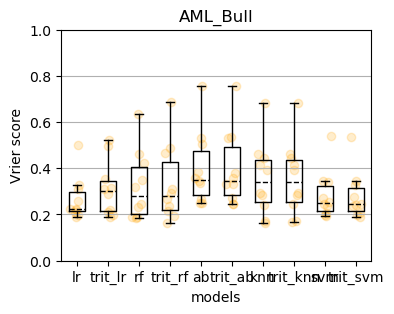

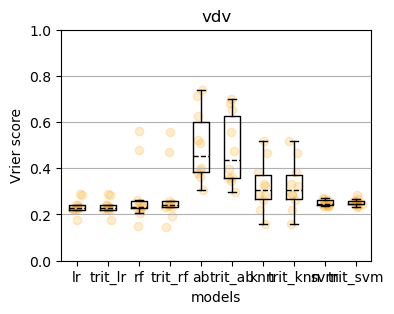

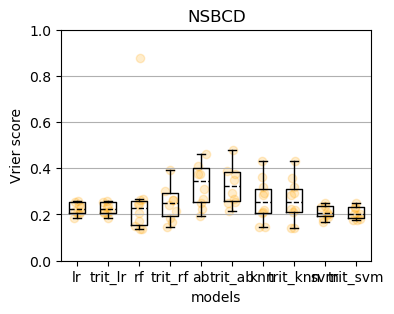

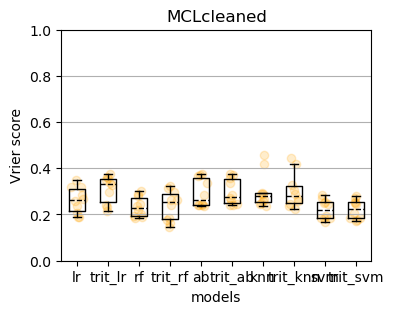

In [7]:
for dataset in datasets_wide: 
    showBrierComparison(dataset, models)

In [8]:
import matplotlib.ticker as ticker

def printOverallComparison(datasets, metrics = ['cindex', 'brier']): 
    
    global models 
    colors = ['#d8955b', '#82beb0' ]


    fig, ax1 = plt.subplots(2, figsize=(5, 5))
    extra_artists = []

    
    for n_plot, metric in enumerate(metrics): 
        
        overall_data = []
        overall_labels = []
        

        for model in models: 
            row = []
            for dataset in datasets: 
                scores = pk.load(open(f'results/scores_dataset=({dataset})_model=({model}).pk', 'rb'))
                row.append(np.mean(scores[metric]))
            overall_labels.append(model)
            overall_data.append(row)

        #BIG PLOT 
        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.05, len(d)))

        bp = ax1[n_plot].boxplot(overall_data, showfliers=False, 
                                 showmeans=True, meanline=True, meanprops=dict(linestyle=(0, (1,1)), linewidth=1, color='red'))
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), [expand_name[l] for l in overall_labels], rotation = 45, ha='right')

        plt.tight_layout()
        ax1[n_plot].grid()
        if n_plot==0: 
            ax1[n_plot].set_ylim(0.4, 1)
        else: 
            ax1[n_plot].set_ylim(0, 1)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)

        ax1[n_plot].set_ylabel(metric_labels[metric])

        alpha_points = 0.4
        for i, (x, d, m) in enumerate(zip(xs, overall_data, models)): 
            for axis, point, dataset in zip(x, d, datasets):
                alpha_points=0.4
                marker = 'o'
                ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=model_colors[m], marker=marker)

        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot != len(metrics)-1:
            ax1[n_plot].xaxis.set_ticks(range(1,len(overall_labels)+1), ['']*len(overall_labels))
            #overall legend
            for color in color_names.keys(): 
                plt.scatter([], [], color = color,  marker='s', label=color_names.get(color))
    
    plt.legend(loc='upper left')
    plt.show()
    fig.savefig(f'figs/comparative_datasets_{len(datasets)}.pdf', bbox_inches='tight', format='pdf') 

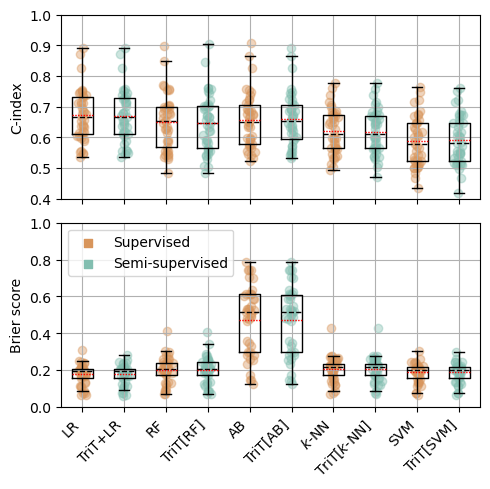

In [9]:
printOverallComparison(datasets_narrow, metrics = ['cindex', 'brier'])

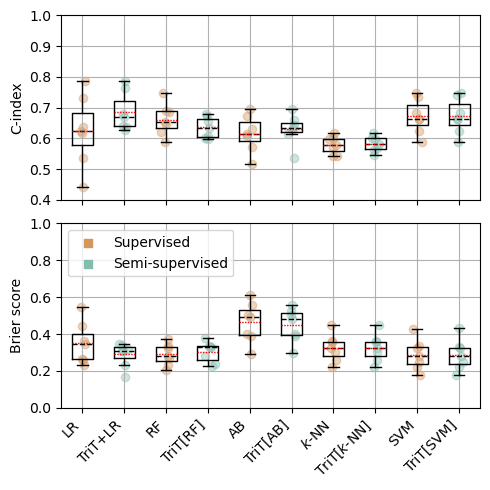

In [10]:
printOverallComparison(datasets_wide, metrics = ['cindex', 'brier'])